# **Used Car Data Analysis**

Data analysis project consisting of data cleaning, data manipulation and data visualization


*   *Data sourced from Kaggle: https://www.kaggle.com/code/smithakishan/used-car-price-prediction/data*

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Reading the CSV file and displaying first 5 entries

In [2]:
data = pd.read_csv('carvana.csv')
data.head()

,Name,Year,Miles,Price
0,Chevrolet Trax,2018,41946,16990
1,GMC Terrain,2020,45328,23990
2,Jeep Wrangler,2012,81068,21590
3,Jeep Renegade,2019,35372,21590
4,BMW X,20173,68992,22990


Display data type

In [3]:
data.dtypes

Name     object
Year      int64
Miles     int64
Price     int64
dtype: object

Cleaning data to display "Year" as 4 digit numbers

In [4]:
df = data['Year']
df['Year'] = df.astype(str).str[:4]
data['Year'] = df['Year']
data.head()

<ipython-input-4-26f7f750cb07>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df.astype(str).str[:4]


,Name,Year,Miles,Price
0,Chevrolet Trax,2018,41946,16990
1,GMC Terrain,2020,45328,23990
2,Jeep Wrangler,2012,81068,21590
3,Jeep Renegade,2019,35372,21590
4,BMW X,2017,68992,22990


In [5]:
data.dtypes

Name     object
Year     object
Miles     int64
Price     int64
dtype: object

Data type of "Year" is an object so now converting back to int

In [6]:
data['Year'] = data['Year'].astype(int)
data.dtypes

Name     object
Year      int64
Miles     int64
Price     int64
dtype: object

Group car models together and determine the average, minimum, and max year for each

In [7]:
grouped_name = data.groupby('Name').agg({'Year': ['mean', 'min', 'max']})
grouped_name.columns = ['Mean_Year', 'Min_year', 'Max_Year']
grouped_name.round(2)

,Mean_Year,Min_year,Max_Year
Name,,,
Acura ILX,2015.68,2013,2018
Acura MDX,2010.74,2010,2019
Acura MDX Sport Hybrid,2019.00,2019,2019
Acura RDX,2012.64,2011,2021
Acura RLX,2014.00,2014,2014
...,...,...,...
Volvo XC,2014.91,2012,2021
smart fortwo,2014.35,2012,2016
smart fortwo electric drive,2016.22,2014,2018


Group by car model and year, then display the average, minimum, and max price for each grouping

In [8]:
grouped_name_year = data.groupby(['Name', 'Year']).agg({'Price': ['mean', 'min', 'max']})
grouped_name_year.columns = ['Mean_Price', 'Min_Price', 'Max_Price']
display(grouped_name_year.head(10).round(2), grouped_name_year.tail(10).round(2))

Mean_Price  Min_Price  Max_Price
Name       Year                                  
 Acura ILX 2013    16390.00      15990      16990
           2014    17490.00      15990      17990
           2016    21590.00      21590      21590
           2017    21290.00      20990      21590
           2018    23990.00      23990      23990
 Acura MDX 2010    16590.00      16590      16590
           2012    20790.00      17590      21990
           2014    23075.71      20590      24990
           2015    24990.00      24990      24990
           2016    23990.00      21990      25990

Mean_Price  Min_Price  Max_Price
Name                                Year                                  
 smart fortwo                       2012    12990.00      12990      12990
                                    2013    14590.00      12990      14990
                                    2014    13723.33      13590      13990
                                    2015    13190.00      11990      13990
                                    2016    16590.00      16590      16590
 smart fortwo electric drive        2014    12990.00      12990      12990
                                    2015    13440.00      12990      13590
                                    2018    16940.00      15990      18590
 smart fortwo electric drive cabrio 2018    18590.00      18590      18590
Kia Sorento                         2011    14590.00      14590      14590

# **Data Visualization**

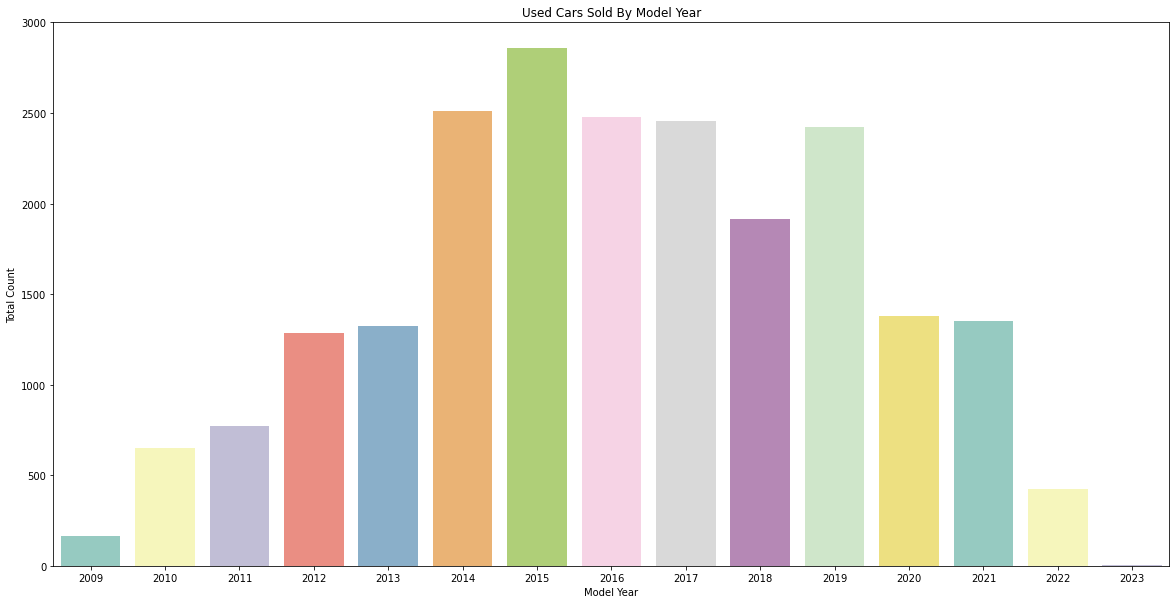

In [9]:
fig = plt.figure(figsize=(20,10))
sns.countplot(x = 'Year', data = data, palette = 'Set3')
plt.title("Used Cars Sold By Model Year")
plt.xlabel('Model Year')
plt.ylabel('Total Count')
plt.show()

Of the cars being sold, the most popular model year is around 2016. Whereas both ends of the spectrum, 2009 and 2023, have the least amount of models being sold. This set of data has a negative skew, having a slight left-skewed distribution.

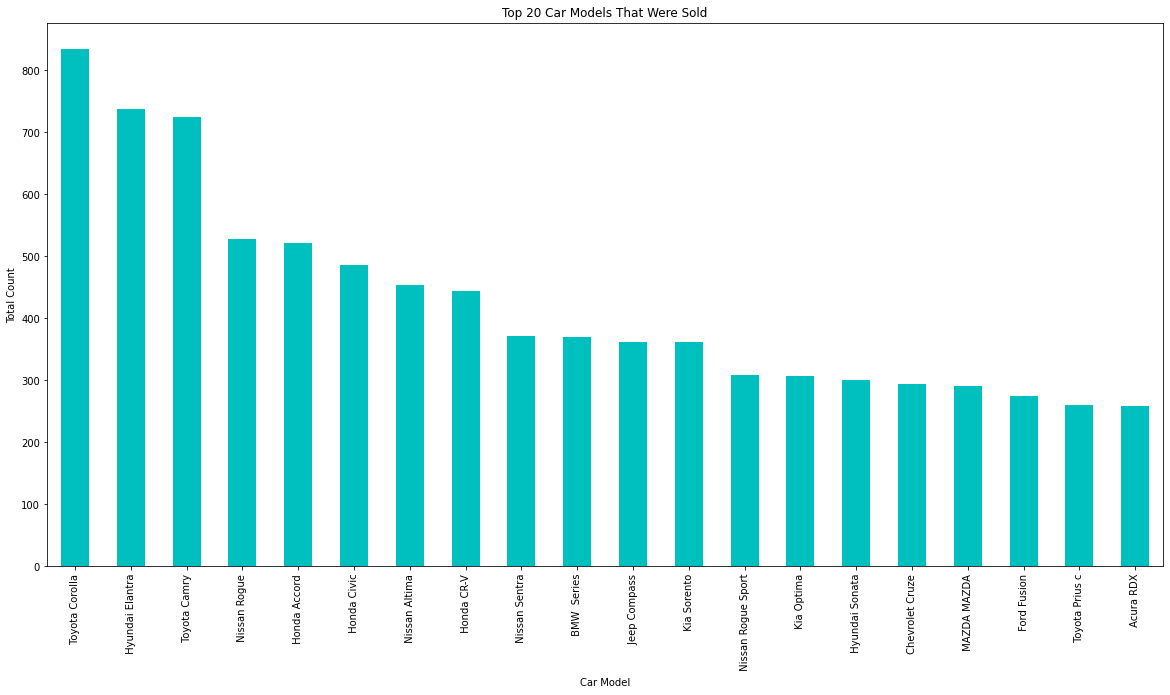

In [10]:
fig = plt.figure(figsize=(20,10))
top_car_models = data['Name'].value_counts().head(20)
top_car_models.plot.bar(color='c')
plt.title("Top 20 Car Models That Were Sold")
plt.xlabel('Car Model')
plt.ylabel('Total Count')
plt.show()

This bar graph simply shows the top 20 car models that were being resold, and how much of each are being sold.

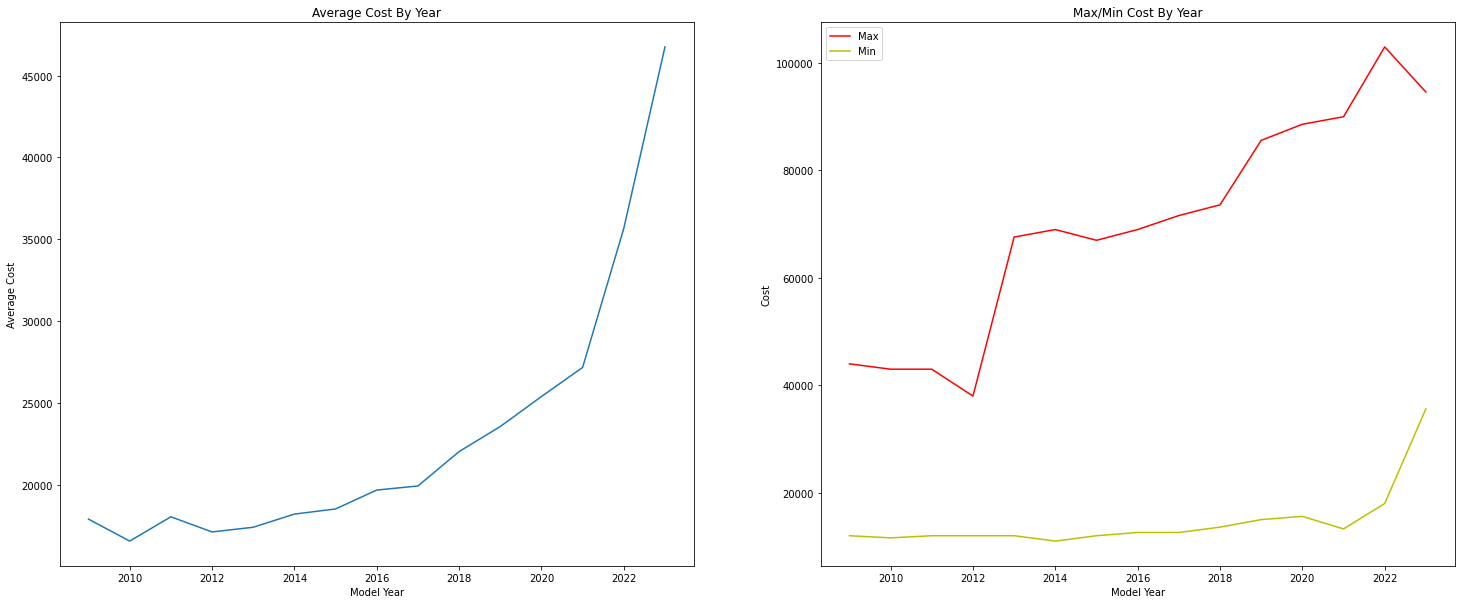

In [11]:
fig = plt.figure(figsize=(25,10))

# Plot 1
plt.subplot(1, 2, 1)
price_mean = data.groupby('Year')['Price'].mean().round()
plt.plot(price_mean)
plt.title("Average Cost By Year")
plt.xlabel('Model Year')
plt.ylabel('Average Cost')

# Plot 2
plt.subplot(1, 2, 2)
price_max = data.groupby('Year')['Price'].max()
price_min = data.groupby('Year')['Price'].min()
plt.plot(price_max, c = 'r', label = 'Max')
plt.plot(price_min, c = 'y', label = 'Min')
plt.legend(loc = 'upper left')
plt.title("Max/Min Cost By Year")
plt.xlabel('Model Year')
plt.ylabel('Cost')

plt.show()

Overall the graph has a positive slope, as the model year increases, the average cost of the used car increases as well. The minimum price has essentially stayed stable but increased sharply from 2021-2023, and the maximum price has dropped since 2022, which both aligns with recent trends in the used car market.

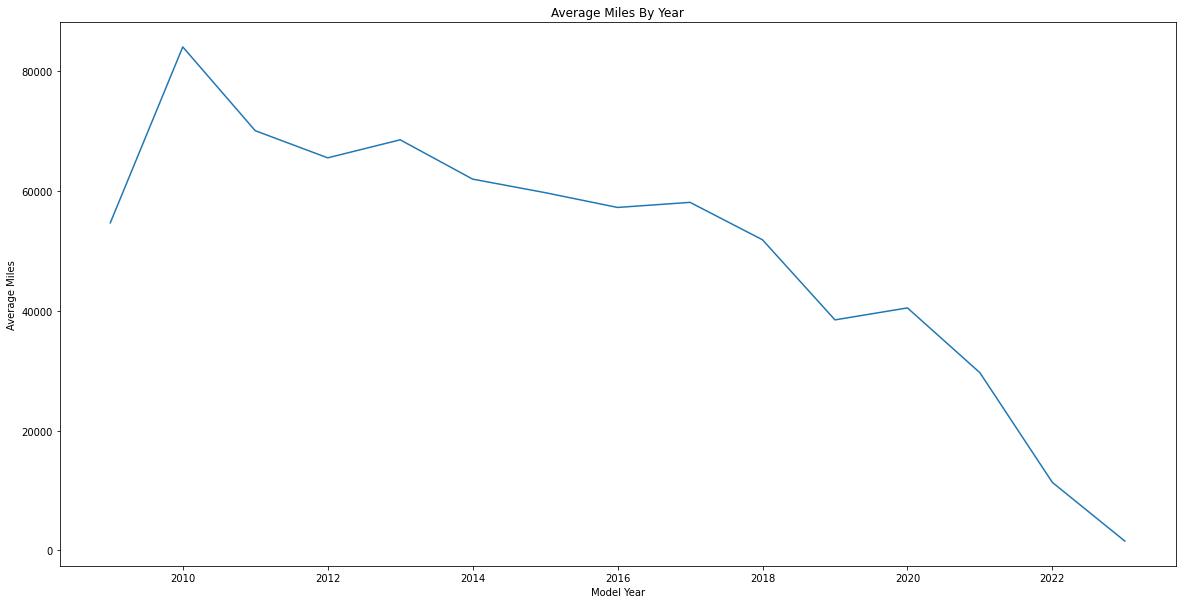

In [12]:
fig = plt.figure(figsize=(20,10))
miles_mean = data.groupby('Year')['Miles'].mean().round()
plt.plot(miles_mean)
plt.title("Average Miles By Year")
plt.xlabel('Model Year')
plt.ylabel('Average Miles')
plt.show()

The conclusion from this graph is that the older the car model year, the more mileage it would have.

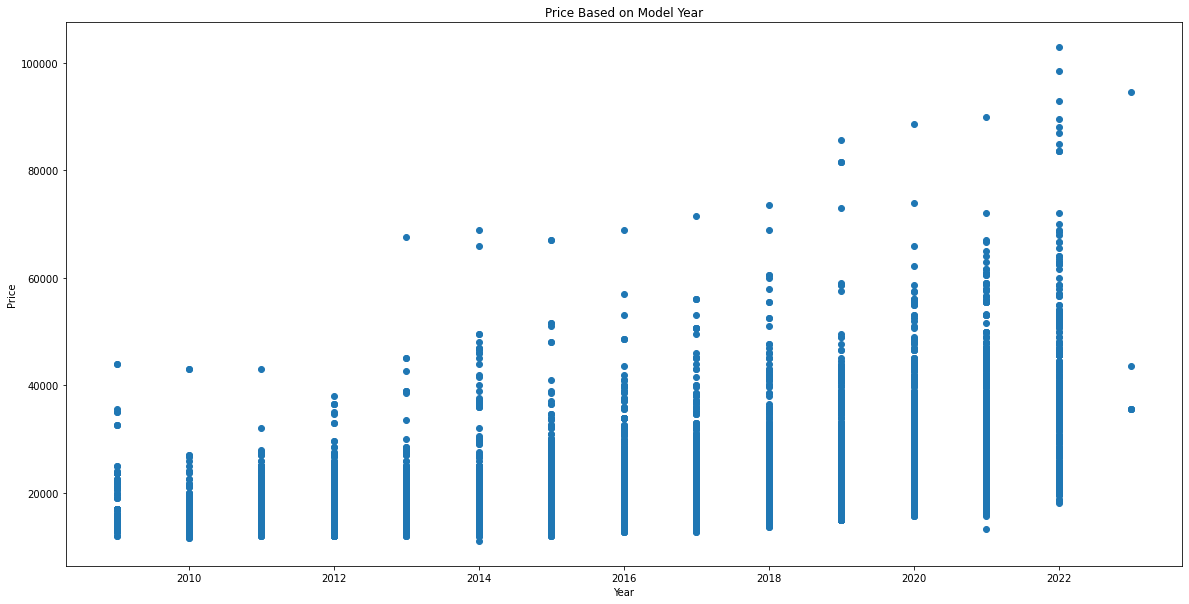

In [14]:
fig = plt.figure(figsize=(20,10))
plt.scatter(data['Year'], data['Price'])
plt.title("Price Based on Model Year")
plt.xlabel("Year")
plt.ylabel("Price")
plt.show()

This graph shows the relationship between model year, and car selling price. As the model year increases, the price increases as well.

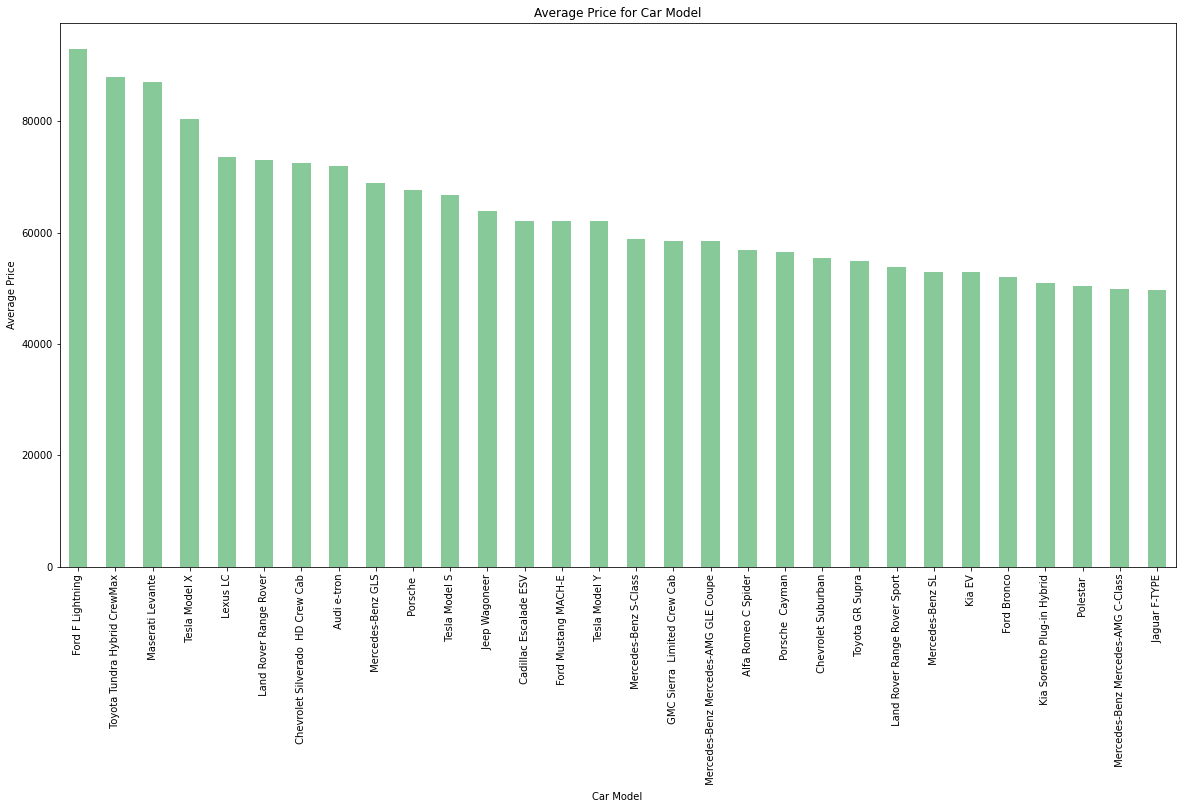

In [13]:
fig = plt.figure(figsize=(20,10))
mean_price_by_model = data.groupby('Name')['Price'].mean().round().nlargest(30)
mean_price_by_model.plot.bar(color = '#88c999')
plt.title("Average Price for Car Model")
plt.xlabel('Car Model')
plt.ylabel('Average Price')
plt.show()

Looking at this chart, we are able to see which car models on average cost the most in the used car market. We are also able to identify certain brands which are likely to cost more, such as Tesla, Ford, and Mercedes-Benz to just name a few.